# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [6]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [7]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-201-MI1-12mw_CRR_DiadFit,103.280030,0.029021,1285.819157,0.026470,113.393552,1285.819157,244.485012,0.686300,4.586106,...,1.018836,0.106869,0.012105,1.095238,1.078624,0.098849,0.005240,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-201-MI1-20mw-rep1,103.242460,0.022794,1285.868169,0.021478,183.433440,1285.868169,368.303945,0.639113,7.311410,...,1.019084,0.026287,0.006968,1.118644,1.119107,0.124714,0.003518,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-201-MI1-20mw-rep2,103.266930,0.031749,1285.869004,0.030660,156.538686,1285.869004,346.038672,0.703644,9.149750,...,1.252066,0.271237,0.008990,1.163763,1.177378,0.167252,0.003767,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-201-MI1-20mw-rep3_CRR_DiadFit,103.270466,0.026006,1285.859442,0.024809,169.334630,1285.859442,357.764720,0.672515,7.987469,...,1.162427,0.194675,0.007943,1.134680,1.100244,0.141951,0.003681,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-210-MI3-rep1,103.388074,0.014590,1285.547522,0.013360,888.468235,1285.547572,2316.367515,0.947961,13.217733,...,1.266094,0.331150,0.002134,1.151042,1.164093,0.203463,0.000755,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [8]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'06 187-1-201-MI1-12mw.txt'

## Now get all the important information out of the metadata files

In [9]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 50/50 [00:00<00:00, 103.81it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-201-MI1-12mw.txt,"June 20, 2024\n",June,20.0,12.034,60.0,4.0,50.0,"['0h', '4m', '1s']",11:17:28 AM\n,40648.0,1324.964
1,187-1-201-MI1-20mw-rep1.txt,"June 20, 2024\n",June,20.0,19.920,60.0,4.0,50.0,"['0h', '4m', '1s']",11:26:47 AM\n,41207.0,1324.964
2,187-1-201-MI1-20mw-rep2.txt,"June 20, 2024\n",June,20.0,19.826,60.0,4.0,50.0,"['0h', '4m', '1s']",11:31:24 AM\n,41484.0,1324.964
3,187-1-201-MI1-20mw-rep3.txt,"June 20, 2024\n",June,20.0,19.759,60.0,4.0,50.0,"['0h', '4m', '1s']",11:36:13 AM\n,41773.0,1324.964
4,FG04-A1-4-start-rep1.txt,"June 20, 2024\n",June,20.0,6.063,45.0,5.0,50.0,"['0h', '3m', '46s']",1:12:24 PM\n,47544.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [10]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-201-MI1-12mw'

In [11]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-201-MI1-12mw', '187-1-201-MI1-20mw-rep1',
       '187-1-201-MI1-20mw-rep2', '187-1-201-MI1-20mw-rep3',
       'FG04-A1-4-start-rep1', 'FG04-A1-4-start-rep2',
       'FG04-A1-4-start-rep3', 'FG04-A1-16-start-rep1',
       'FG04-A1-16-start-rep2', 'FG04-A1-16-start-rep3',
       'FG04-A1-4-middle-rep4', '187-1-210-MI3-rep1',
       '187-1-210-MI3-rep2', '187-1-210-MI3-rep3', '187-1-212-MI1-rep1',
       '187-1-212-MI1-rep2', '187-1-212-MI1-rep3', '187-1-212-MI2-rep1',
       '187-1-212-MI2-rep2', '187-1-212-MI3-rep1', '187-1-212-MI3-rep2',
       '187-1-212-MI3-rep3', '187-1-212-MI2-rep3', 'FG04-A1-4-end-rep5',
       'FG04-A1-4-end-rep6', 'FG04-A1-4-end-rep7', 'FG04-A1-16-end-rep4',
       'FG04-A1-16-end-rep5', 'FG04-A1-16-end-rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [12]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-201-MI1-12mw


In [13]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-201-MI1-12mw', '187-1-201-MI1-20mw-rep1',
       '187-1-201-MI1-20mw-rep2', '187-1-201-MI1-20mw-rep3',
       '187-1-210-MI3-rep1', '187-1-210-MI3-rep2', '187-1-210-MI3-rep3',
       '187-1-212-MI1-rep1', '187-1-212-MI1-rep2', '187-1-212-MI1-rep3',
       '187-1-212-MI2-rep1', '187-1-212-MI2-rep2', '187-1-212-MI2-rep3',
       '187-1-212-MI3-rep1', '187-1-212-MI3-rep2', '187-1-212-MI3-rep3',
       'FG04-A1-4-start-rep1', 'FG04-A1-4-start-rep2',
       'FG04-A1-4-start-rep3', 'FG04-A1-16-start-rep1',
       'FG04-A1-16-start-rep2', 'FG04-A1-16-start-rep3',
       'FG04-A1-4-middle-rep4', 'FG04-A1-4-end-rep5',
       'FG04-A1-4-end-rep6', 'FG04-A1-4-end-rep7', 'FG04-A1-16-end-rep4',
       'FG04-A1-16-end-rep5', 'FG04-A1-16-end-rep6'], dtype='<U23')

In [14]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-201-MI1-12mw,103.280030,0.029021,1285.819157,0.026470,113.393552,1285.819157,244.485012,0.686300,4.586106,...,June,20.0,12.034,60.0,4.0,50.0,"['0h', '4m', '1s']",11:17:28 AM\n,40648.0,1324.964
1,187-1-201-MI1-20mw-rep1,103.242460,0.022794,1285.868169,0.021478,183.433440,1285.868169,368.303945,0.639113,7.311410,...,June,20.0,19.920,60.0,4.0,50.0,"['0h', '4m', '1s']",11:26:47 AM\n,41207.0,1324.964
2,187-1-201-MI1-20mw-rep2,103.266930,0.031749,1285.869004,0.030660,156.538686,1285.869004,346.038672,0.703644,9.149750,...,June,20.0,19.826,60.0,4.0,50.0,"['0h', '4m', '1s']",11:31:24 AM\n,41484.0,1324.964
3,187-1-201-MI1-20mw-rep3,103.270466,0.026006,1285.859442,0.024809,169.334630,1285.859442,357.764720,0.672515,7.987469,...,June,20.0,19.759,60.0,4.0,50.0,"['0h', '4m', '1s']",11:36:13 AM\n,41773.0,1324.964
4,187-1-210-MI3-rep1,103.388074,0.014590,1285.547522,0.013360,888.468235,1285.547572,2316.367515,0.947961,13.217733,...,June,20.0,12.002,60.0,4.0,50.0,"['0h', '4m', '1s']",3:59:31 PM\n,57571.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [15]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [16]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [17]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.182422412846337e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-12mw,0.127717,0.012107,0.011481,0.003842,103.072577,0.028974,0.000821,0.029021,12.034,...,NaN,NaN,NaN,NaN,NaN,NaN,40648.0,0.997991,0.997983,0.997999
1,187-1-201-MI1-20mw-rep1,0.112586,0.009794,0.009019,0.003817,103.034390,0.022762,0.000818,0.022794,19.920,...,NaN,NaN,NaN,NaN,NaN,NaN,41207.0,0.997985,0.997977,0.997993
2,187-1-201-MI1-20mw-rep2,0.122132,0.013130,0.012559,0.003831,103.058482,0.031695,0.000817,0.031749,19.826,...,NaN,NaN,NaN,NaN,NaN,NaN,41484.0,0.997981,0.997974,0.997989
3,187-1-201-MI1-20mw-rep3,0.123398,0.010980,0.010289,0.003834,103.061677,0.025966,0.000815,0.026006,19.759,...,NaN,NaN,NaN,NaN,NaN,NaN,41773.0,0.997978,0.997970,0.997986
4,187-1-210-MI3-rep1,0.166388,0.007004,0.005778,0.003957,103.170173,0.014583,0.000824,0.014590,12.002,...,NaN,NaN,NaN,NaN,0.009422,0.004054,57571.0,0.997892,0.997884,0.997900


In [18]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.182422412846337e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-12mw,0.127717,0.012107,0.011481,0.003842,103.072577,0.028974,0.000821,0.029021,12.034,...,NaN,NaN,NaN,NaN,NaN,NaN,40648.0,0.997991,0.997983,0.997999
1,187-1-201-MI1-20mw-rep1,0.112586,0.009794,0.009019,0.003817,103.034390,0.022762,0.000818,0.022794,19.920,...,NaN,NaN,NaN,NaN,NaN,NaN,41207.0,0.997985,0.997977,0.997993
2,187-1-201-MI1-20mw-rep2,0.122132,0.013130,0.012559,0.003831,103.058482,0.031695,0.000817,0.031749,19.826,...,NaN,NaN,NaN,NaN,NaN,NaN,41484.0,0.997981,0.997974,0.997989
3,187-1-201-MI1-20mw-rep3,0.123398,0.010980,0.010289,0.003834,103.061677,0.025966,0.000815,0.026006,19.759,...,NaN,NaN,NaN,NaN,NaN,NaN,41773.0,0.997978,0.997970,0.997986
4,187-1-210-MI3-rep1,0.166388,0.007004,0.005778,0.003957,103.170173,0.014583,0.000824,0.014590,12.002,...,NaN,NaN,NaN,NaN,0.009422,0.004054,57571.0,0.997892,0.997884,0.997900


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [19]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 20, 2024_fitted_2024-08-22.xlsx


## This helps visualize the errors on each spectra 

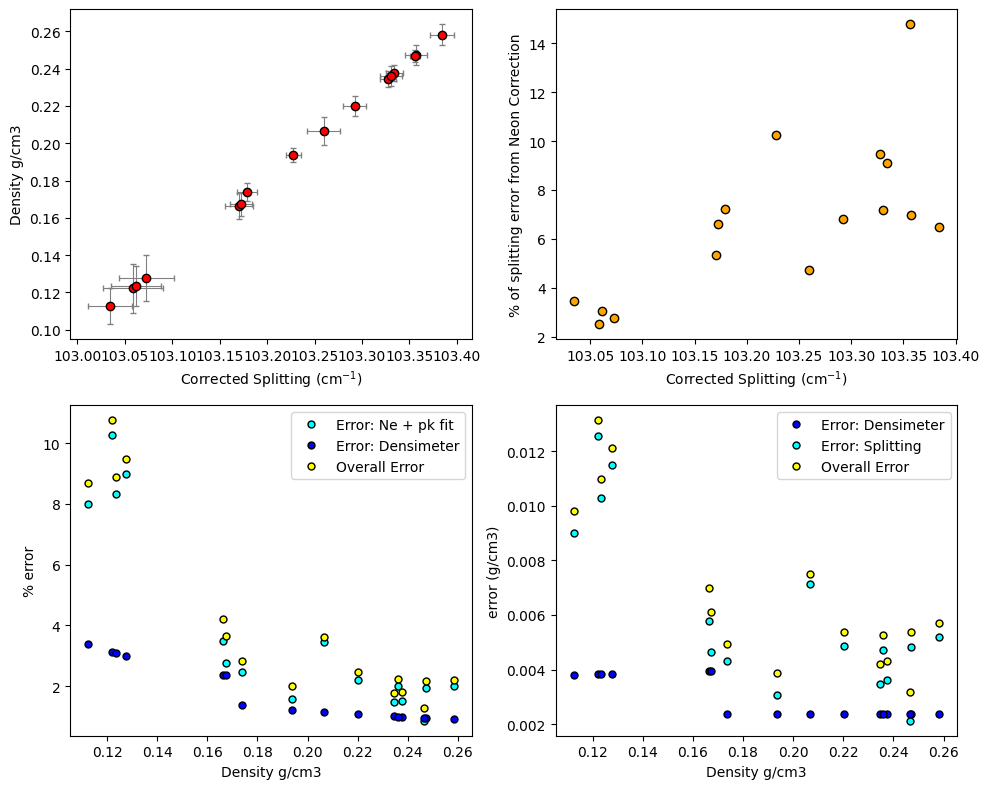

In [20]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [21]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-12mw,0.127717,0.012107,0.011481,0.003842,103.072577,0.028974,0.000821,0.029021,12.034,...,NaN,NaN,NaN,NaN,NaN,NaN,40648.0,0.997991,0.997983,0.997999
1,187-1-201-MI1-20mw-rep1,0.112586,0.009794,0.009019,0.003817,103.034390,0.022762,0.000818,0.022794,19.920,...,NaN,NaN,NaN,NaN,NaN,NaN,41207.0,0.997985,0.997977,0.997993
2,187-1-201-MI1-20mw-rep2,0.122132,0.013130,0.012559,0.003831,103.058482,0.031695,0.000817,0.031749,19.826,...,NaN,NaN,NaN,NaN,NaN,NaN,41484.0,0.997981,0.997974,0.997989
3,187-1-201-MI1-20mw-rep3,0.123398,0.010980,0.010289,0.003834,103.061677,0.025966,0.000815,0.026006,19.759,...,NaN,NaN,NaN,NaN,NaN,NaN,41773.0,0.997978,0.997970,0.997986
4,187-1-210-MI3-rep1,0.166388,0.007004,0.005778,0.003957,103.170173,0.014583,0.000824,0.014590,12.002,...,NaN,NaN,NaN,NaN,0.009422,0.004054,57571.0,0.997892,0.997884,0.997900
5,187-1-210-MI3-rep2,0.167317,0.006094,0.004631,0.003961,103.172516,0.011687,0.000826,0.011682,12.007,...,NaN,NaN,NaN,NaN,NaN,NaN,57908.0,0.997891,0.997883,0.997899
6,187-1-210-MI3-rep3,0.173692,0.004918,0.004308,0.002373,103.178718,0.010613,0.000828,0.010603,12.012,...,NaN,NaN,NaN,NaN,NaN,NaN,58163.0,0.997891,0.997883,0.997899
7,187-1-212-MI1-rep1,0.193686,0.003881,0.003075,0.002368,103.227824,0.007528,0.000856,0.007495,12.073,...,NaN,NaN,NaN,NaN,NaN,NaN,62003.0,0.997879,0.997871,0.997888
8,187-1-212-MI1-rep2,0.220120,0.005394,0.004849,0.002363,103.292265,0.011769,0.000859,0.011763,5.995,...,NaN,NaN,NaN,NaN,NaN,NaN,62381.0,0.997878,0.997870,0.997886
9,187-1-212-MI1-rep3,0.206711,0.007505,0.007123,0.002365,103.259645,0.017365,0.000862,0.017381,6.002,...,NaN,NaN,NaN,NaN,NaN,NaN,62683.0,0.997877,0.997869,0.997885


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

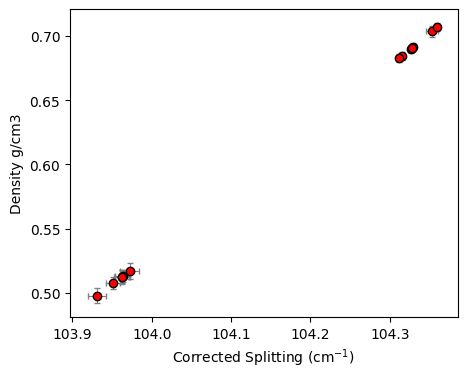

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [23]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

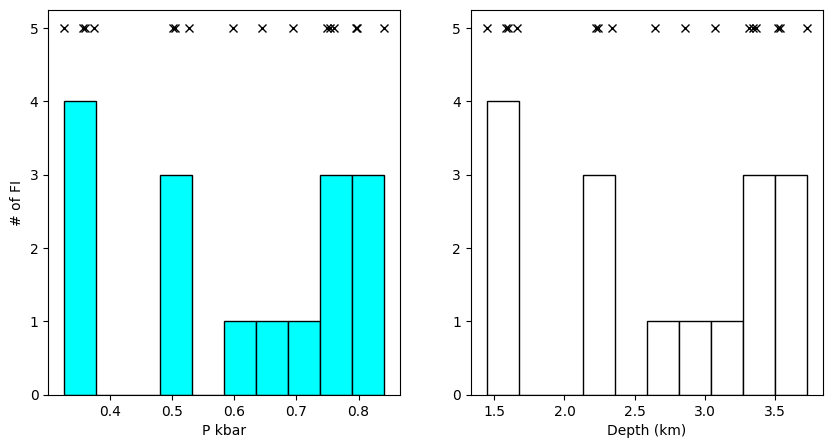

In [24]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')